***Intern : Abhishek Tripathy***

Task 3 Exploratory Data Analysis - Retail

We have to find out the weak areas where we can work to make more profit using the given dataset. And we also have to derive business problems.

# 1. Import Data

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#importing dataset
raw_data=pd.read_csv('SampleSuperstore.csv')
raw_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# 2. Exploring Data 

In [3]:
#summary of dataset
raw_data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
#checking for null values, and data types
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
raw_data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

- There are no missing values.
- There are 13 features in data, and 9994 rows.

**Checking for duplicates**

In [6]:
#no. of duplicated rows
raw_data.duplicated().sum()

17

- 17 duplicated values are present, which is 0.17 % of data. So, it can be deleted.

In [7]:
#drop duplicated values
raw_data=raw_data.drop_duplicates()

In [8]:
#summary of dataset after dropping duplicates
raw_data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


- Now there are 9977 samples/rows in the dataset.

In [9]:
#unique no. of rows in each columns
raw_data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

- The data is only for 1 country. We can remove the country column.
- Our data covers the details of sales of 49 states, 531 cities divided in 4 different regions.

In [10]:
#dropping unnecessary columns
raw_data=raw_data.drop('Country', axis=1)

# 3. Exploring city, state, postal code, and region

Every city has different Postal Codes, So we should drop one of the two columns.

In [11]:
#saving data in new variable after dropping postal code
data= raw_data.drop('Postal Code',axis=1)#data without postal code

#checking datatypes of features again
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 11 columns):
Ship Mode       9977 non-null object
Segment         9977 non-null object
City            9977 non-null object
State           9977 non-null object
Region          9977 non-null object
Category        9977 non-null object
Sub-Category    9977 non-null object
Sales           9977 non-null float64
Quantity        9977 non-null int64
Discount        9977 non-null float64
Profit          9977 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 935.3+ KB


# Checking Region

In [12]:
#Unique no. of regions
data['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

There are only four regions. Looking at the data, we can see that we have three categorical variables, which are basically related.

- City:- Having the most number of unique values
- State:- Having number of unique values less than city
- Region:- Only four unique values

# Checking Sub-category & Category

In [13]:
#Comparing values in Category, and subcategory
print(data['Sub-Category'].unique())
print(data['Category'].unique())

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
['Furniture' 'Office Supplies' 'Technology']


# Correlation Check

In [14]:
attributes=['Sales', 'Quantity' , 'Discount', 'Profit']
#correlation matrix
corr_mat = data.corr()
corr_mat

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


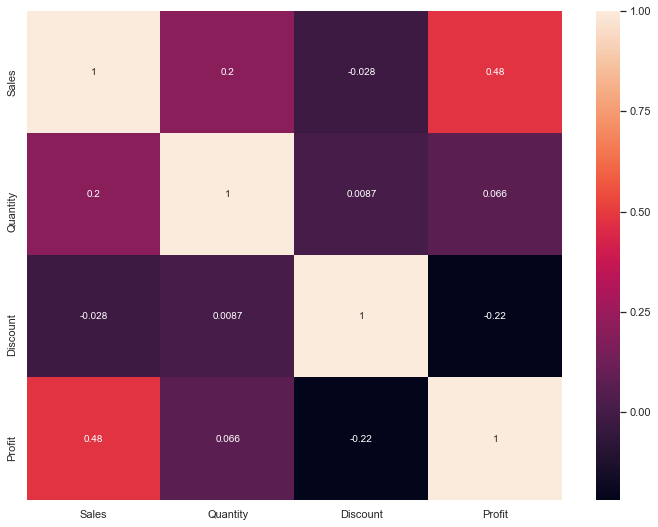

In [15]:
#plotting correlaton matrix
plt.subplots(figsize=(12,9))
sns.heatmap(corr_mat ,annot=True)
plt.show()

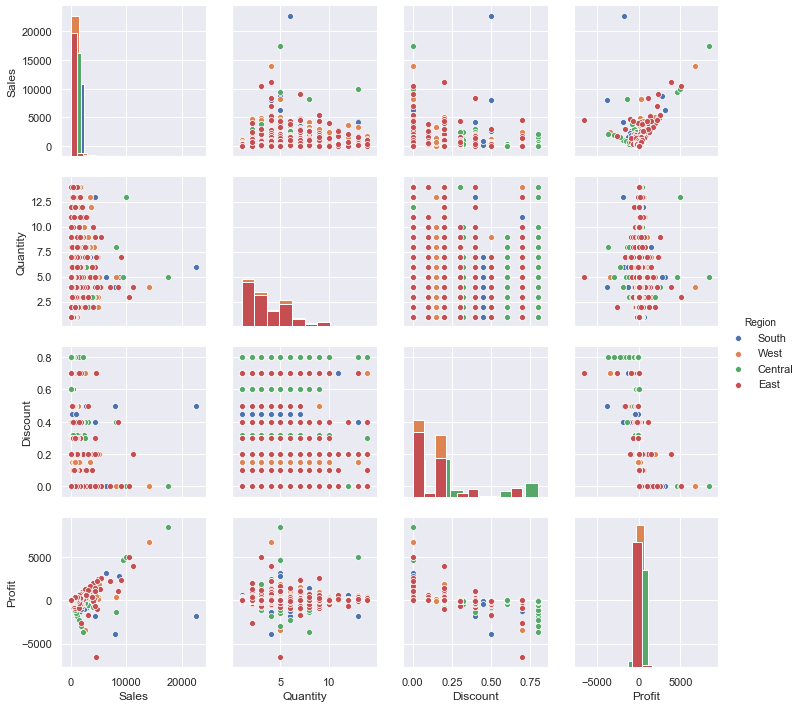

In [16]:
#plottig pair plot (Region wise)
sns.pairplot(data, hue='Region', diag_kind="hist")

# It seems Profit is highly correlated with Sales.

**Sales v/s Profit**

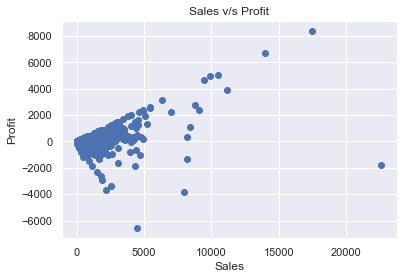

In [17]:
#scatter plot
plt.scatter(data['Sales'], data['Profit'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales v/s Profit')
plt.show()

At lower sales, a business either gets profit or loss. But, when the sales are high, a business mostly gets profit.

**Profit to Sales Ratio**

In [18]:
#plotting profit v/s sales statewise
profit_to_sales = pd.DataFrame(data.groupby('State').sum()[['Sales','Profit']])
profit_to_sales['Profit_to_sales'] = profit_to_sales['Profit']/profit_to_sales['Sales']
profit_to_sales.sort_values(by='Profit_to_sales', inplace=True, ascending=False)
print("Highest 10 Ratios:\n")
print(profit_to_sales[:10])
print('='*70)
print("Lowest 10 Ratios:\n")
print(profit_to_sales[-10:])

Highest 10 Ratios:

                          Sales      Profit  Profit_to_sales
State                                                       
District of Columbia   2865.020   1059.5893         0.369837
Delaware              27451.069   9977.3748         0.363460
Minnesota             29863.150  10823.1874         0.362426
Maine                  1270.530    454.4862         0.357714
Arkansas              11678.130   4008.6871         0.343264
Indiana               53555.360  18382.9363         0.343251
Georgia               49095.840  16250.0433         0.330986
Montana                5589.352   1833.3285         0.328004
Rhode Island          22627.956   7285.6293         0.321975
Michigan              75879.644  24428.0903         0.321932
Lowest 10 Ratios:

                      Sales      Profit  Profit_to_sales
State                                                   
Florida          89473.7080  -3399.3017        -0.037992
Oregon           17420.7820  -1194.0993        -0.068545
A

- Ohio has the worst profit to sales ratio.
- District of Columbia has the highest profit to sales ratio.
- The states California, New York doesn't come in the list of top 10 states with highest profit to sales ratio that means there is still some room for improvement.

# 4. Region-wise Analysis

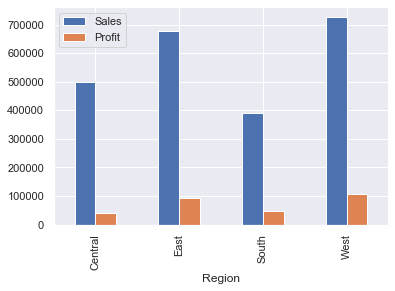

In [19]:
pd.DataFrame(data.groupby('Region').sum()[['Sales','Profit']]).plot(kind='bar')

- Western & Eastern regions have shown higher sales and profits as compared to the Southern and central regions.
- Central region has higher sales than the Southern region but it has shown lower profit gains between the two of them.

# 5. State-wise Analysis

In [20]:
# Top 10 states with maximum number of items sold
data.groupby('State').count()['Quantity'].sort_values(ascending=False)[:10]

State
California        1996
New York          1127
Texas              983
Pennsylvania       586
Washington         502
Illinois           491
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Name: Quantity, dtype: int64

In [21]:
# 10 states with minimum number of items sold
data.groupby('State').count()['Quantity'].sort_values()[:10]

State
Wyoming                  1
West Virginia            4
North Dakota             7
Maine                    8
District of Columbia    10
Vermont                 11
South Dakota            12
Montana                 15
Idaho                   21
Kansas                  24
Name: Quantity, dtype: int64

In [24]:
#total statewise sales in descending order
state_wise_sales = pd.DataFrame(data.groupby('State').sum()['Sales']).sort_values(by ='Sales',ascending= False)
state_wise_sales.reset_index(inplace=True)
state_wise_sales.head()

,State,Sales
0,California,457576.2715
1,New York,310827.1510
2,Texas,170124.5418
3,Washington,138560.8100
4,Pennsylvania,116496.3620


In [25]:
# Top 10 stores with maximum amount of sales
print('States with maximum amount of sales:\n',state_wise_sales[:10])

print('\n','='*50, '\n')

# Stores with minimum amount of sales
print('States with minimum amount of sales:\n',state_wise_sales[-10:])

States with maximum amount of sales:
           State        Sales
0    California  457576.2715
1      New York  310827.1510
2         Texas  170124.5418
3    Washington  138560.8100
4  Pennsylvania  116496.3620
5       Florida   89473.7080
6      Illinois   80162.5370
7          Ohio   77976.7640
8      Michigan   75879.6440
9      Virginia   70636.7200


States with minimum amount of sales:
                    State     Sales
39            New Mexico  4783.522
40                  Iowa  4579.760
41                 Idaho  4382.486
42                Kansas  2914.310
43  District of Columbia  2865.020
44               Wyoming  1603.136
45          South Dakota  1315.560
46                 Maine  1270.530
47         West Virginia  1209.824
48          North Dakota   919.910


- The company needs to focus more on these 10 states that have least amount of sales.

In [26]:
# Top 10 states with maximum amount of profit
print('States with maximum amount of profit:\n',data.groupby('State').sum()['Profit'].sort_values(ascending= False)[:10])

print('\n','='*50, '\n')

# States with minimum amount of profit
print('States with minimum amount of profit:\n',data.groupby('State').sum()['Profit'].sort_values()[:10])

States with maximum amount of profit:
 State
California    76330.7891
New York      74015.4622
Washington    33368.2375
Michigan      24428.0903
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64


States with minimum amount of profit:
 State
Texas            -25750.9833
Ohio             -16959.3178
Pennsylvania     -15565.4035
Illinois         -12601.6500
North Carolina    -7490.9122
Colorado          -6527.8579
Tennessee         -5341.6936
Arizona           -3427.9246
Florida           -3399.3017
Oregon            -1194.0993
Name: Profit, dtype: float64


- Company must focus on cities which made loss.
- They should analyse their resource usage and the categories which are being sold in those states.

In [27]:
#new dataframe having states and regions
state_region = data[['State','Region']]

#drop duplicated values
state_region=state_region.drop_duplicates()
state_region
# adding region column to state_wise_sales dataframe
state_wise_sales= pd.merge(state_wise_sales, state_region)

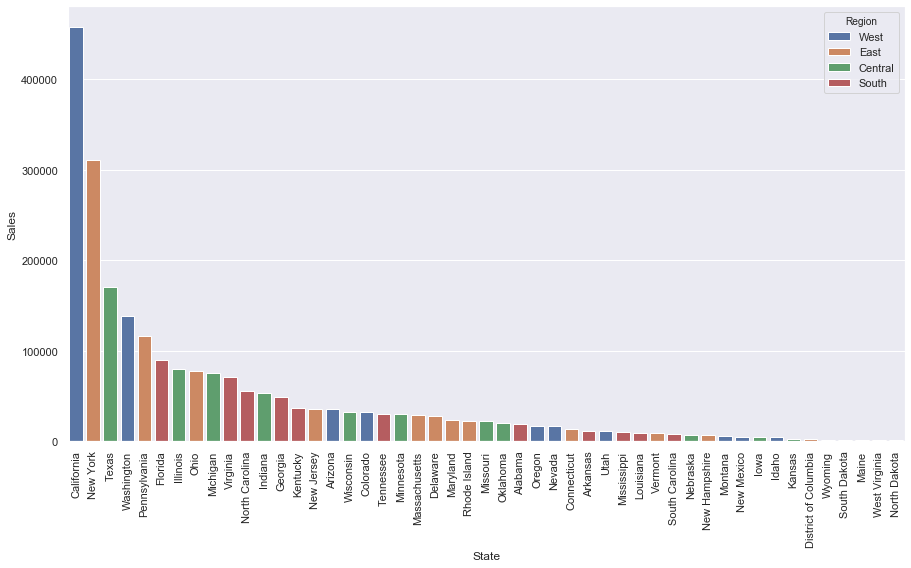

In [28]:
#plotting Sales Statewise
plt.figure(figsize=(15,8))
g = sns.barplot(x='State', y='Sales', data=state_wise_sales, hue='Region', dodge=False)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

- The company has highest sales in the state of California which is around 450k.
- New York is the state that constitutes the second highest sales for the company of around 300k.
- The states of Texas and Washington end up 3rd and 4th on the chart with around 150k and 140k in sales correspondingly.
- Maximum of the sales are done in the west and the east coast regions.

# 6. City-wise Analysis

In [29]:
# Top 10 cities with maximum number of items sold
print('Top 10 cities with maximum number of items sold:\n', data.groupby('City').count()['Quantity'].sort_values(ascending=False)[:10])

print('\n','='*50, '\n')

# Cities with minimum number of items sold
print('10 cities with minimum number of items sold:\n', data.groupby('City').count()['Quantity'].sort_values()[:10])

Top 10 cities with maximum number of items sold:
 City
New York City    914
Los Angeles      746
Philadelphia     536
San Francisco    506
Seattle          424
Houston          375
Chicago          313
Columbus         221
San Diego        170
Springfield      163
Name: Quantity, dtype: int64


10 cities with minimum number of items sold:
 City
Aberdeen        1
Ontario         1
Davis           1
Orland Park     1
Danbury         1
Ormond Beach    1
Iowa City       1
Pensacola       1
Conway          1
Conroe          1
Name: Quantity, dtype: int64


In [30]:
# Top 10 stores with maximum amount of sales
print('Top 10 cities with maximum amount of sales:\n',data.groupby('City').sum()['Sales'].sort_values(ascending=False)[:10])

print('\n','='*50, '\n')

# Stores with minimum amount of sales
print('10 cities with minimum amount of sales:\n',data.groupby('City').sum()['Sales'].sort_values()[:10])

Top 10 cities with maximum amount of sales:
 City
New York City    256319.0410
Los Angeles      175831.9010
Seattle          119460.2820
San Francisco    112577.1720
Philadelphia     109061.4610
Houston           64441.2564
Chicago           48535.9770
San Diego         47521.0290
Jacksonville      44713.1830
Springfield       43054.3420
Name: Sales, dtype: float64


10 cities with minimum amount of sales:
 City
Abilene            1.392
Elyria             1.824
Jupiter            2.064
Pensacola          2.214
Ormond Beach       2.808
San Luis Obispo    3.620
Springdale         4.300
Layton             4.960
Keller             6.000
Missouri City      6.370
Name: Sales, dtype: float64


In [31]:
# Top 10 stores with maximum amount of profit
print('Top 10 cities with maximum amount of profit:\n',data.groupby('City').sum()['Profit'].sort_values(ascending=False)[:10])

print('\n','='*50, '\n')

# Stores with minimum amount of profit
print('10 cities with minimum amount of profit:\n',data.groupby('City').sum()['Profit'].sort_values()[:10])

Top 10 cities with maximum amount of profit:
 City
New York City    62013.8973
Los Angeles      30431.4267
Seattle          29121.6825
San Francisco    17466.1186
Detroit          13146.6935
Lafayette        10018.3876
Jackson           7581.6828
Atlanta           6993.6629
Minneapolis       6824.5846
San Diego         6377.1960
Name: Profit, dtype: float64


10 cities with minimum amount of profit:
 City
Philadelphia   -13843.2106
Houston        -10175.1755
San Antonio     -7299.0502
Lancaster       -7239.0684
Chicago         -6648.3318
Burlington      -3622.8772
Dallas          -2846.5257
Phoenix         -2790.8832
Aurora          -2691.7386
Jacksonville    -2323.8350
Name: Profit, dtype: float64


# 7. Category-wise Analysis¶

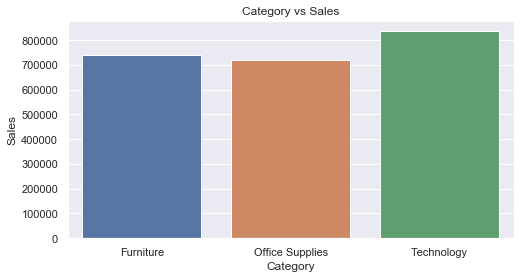

In [32]:
#plotting barplot using the data having total sales of the categories
category_wise_sales = pd.DataFrame(data.groupby('Category').sum()['Sales'])
category_wise_sales.reset_index(inplace=True)
plt.figure(figsize=(8,4))
sns.barplot(x = 'Category', y = 'Sales', data = category_wise_sales)
plt.title('Category vs Sales')
plt.show()

- Technology categry products have higher sales.

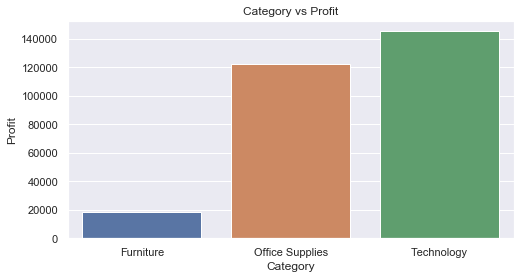

In [33]:
#plotting barplot using the data having total profits of the categories
category_wise_profit = pd.DataFrame(data.groupby('Category').sum()['Profit'])
category_wise_profit.reset_index(inplace=True)
plt.figure(figsize=(8,4))
sns.barplot(x = 'Category', y = 'Profit', data = category_wise_profit)
plt.title('Category vs Profit')
plt.show()

- Technology category products have generated highest profit.
- Furniture category products have sales equivalent to that of office supplies but have profits way less than it.

# 8. Sub Category wise Analysis

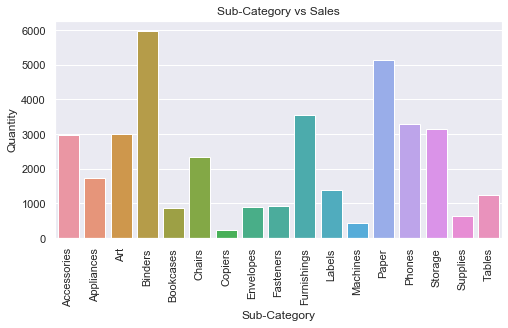

In [34]:
#plotting barplot using the data having total quantity of the sub-categories
subcategory_wise_quantity = pd.DataFrame(data.groupby('Sub-Category').sum()['Quantity'])
subcategory_wise_quantity.reset_index(inplace=True)
plt.figure(figsize=(8,4))
a=sns.barplot(x = 'Sub-Category', y = 'Quantity', data = subcategory_wise_quantity)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
plt.title('Sub-Category vs Sales')
plt.show()

- Binders are the highest selling products. Around 6000 products are sold.
- Copiers, Machines and Supplies being the least selling products.

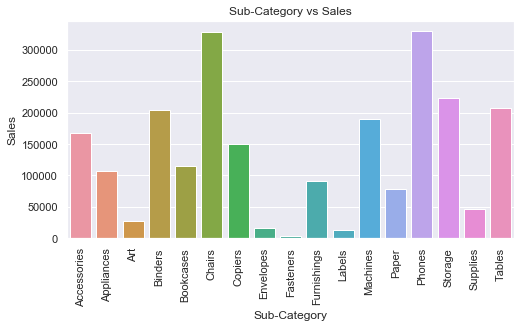

In [35]:
#plotting barplot using the data having total sales of the sub-categories
subcategory_wise_sales = pd.DataFrame(data.groupby('Sub-Category').sum()['Sales'])
subcategory_wise_sales.reset_index(inplace=True)
plt.figure(figsize=(8,4))
a=sns.barplot(x = 'Sub-Category', y = 'Sales', data = subcategory_wise_sales)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
plt.title('Sub-Category vs Sales')
plt.show()

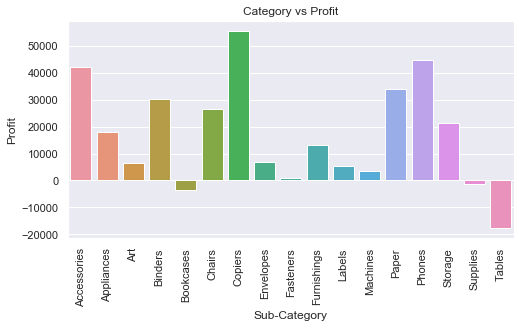

In [36]:
#plotting barplot using the data having total profits of the sub-categories
subcategory_wise_profit = pd.DataFrame(data.groupby('Sub-Category').sum()['Profit'])
subcategory_wise_profit.reset_index(inplace=True)
plt.figure(figsize=(8,4))
a=sns.barplot(x = 'Sub-Category', y = 'Profit', data = subcategory_wise_profit)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
plt.title('Category vs Profit')
plt.show()

- Sub-Categories Tables, Bookcases, and Supplies have resulted in loss. Among them tables have made most of the loss even the quantity of tables sold were very less.

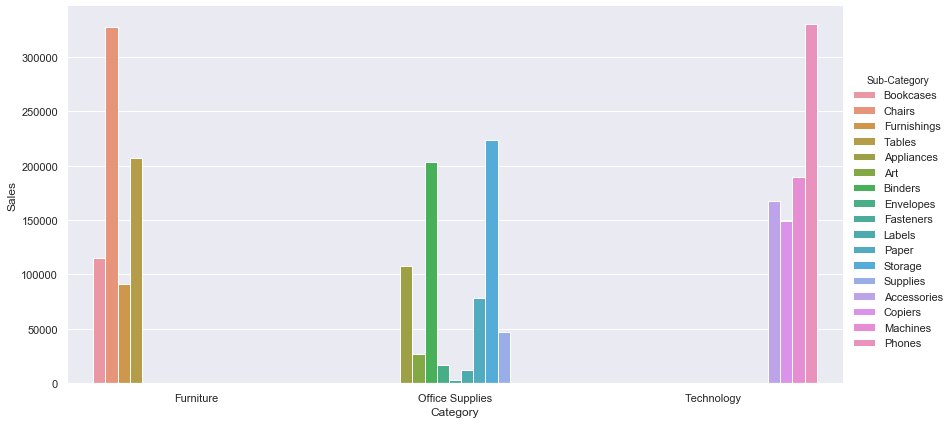

In [37]:
#plotting sub-categories'sales category-wise
categories_products_sales = pd.DataFrame(data.groupby(['Category','Sub-Category']).sum()[['Sales']])
categories_products_sales.reset_index(inplace=True)
sns.catplot(kind='bar', x='Category', y='Sales', data=categories_products_sales, hue='Sub-Category', height=6, aspect=2)

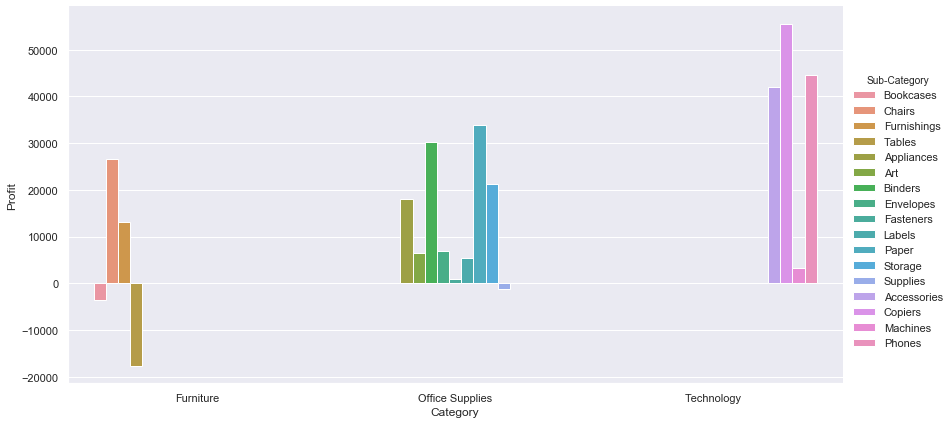

In [38]:
#plotting sub-categories' profit category-wise
categories_products_profit = pd.DataFrame(data.groupby(['Category','Sub-Category']).sum()[['Profit']])
categories_products_profit.reset_index(inplace=True)
sns.catplot(kind='bar', x='Category', y='Profit', data=categories_products_profit, hue='Sub-Category', height=6, aspect=2)

- Furniture category has made most of the loss, and the profit is also less inspite of sales being high.

**Products sold in states with highest sales:**
- California
- Texas
- New York

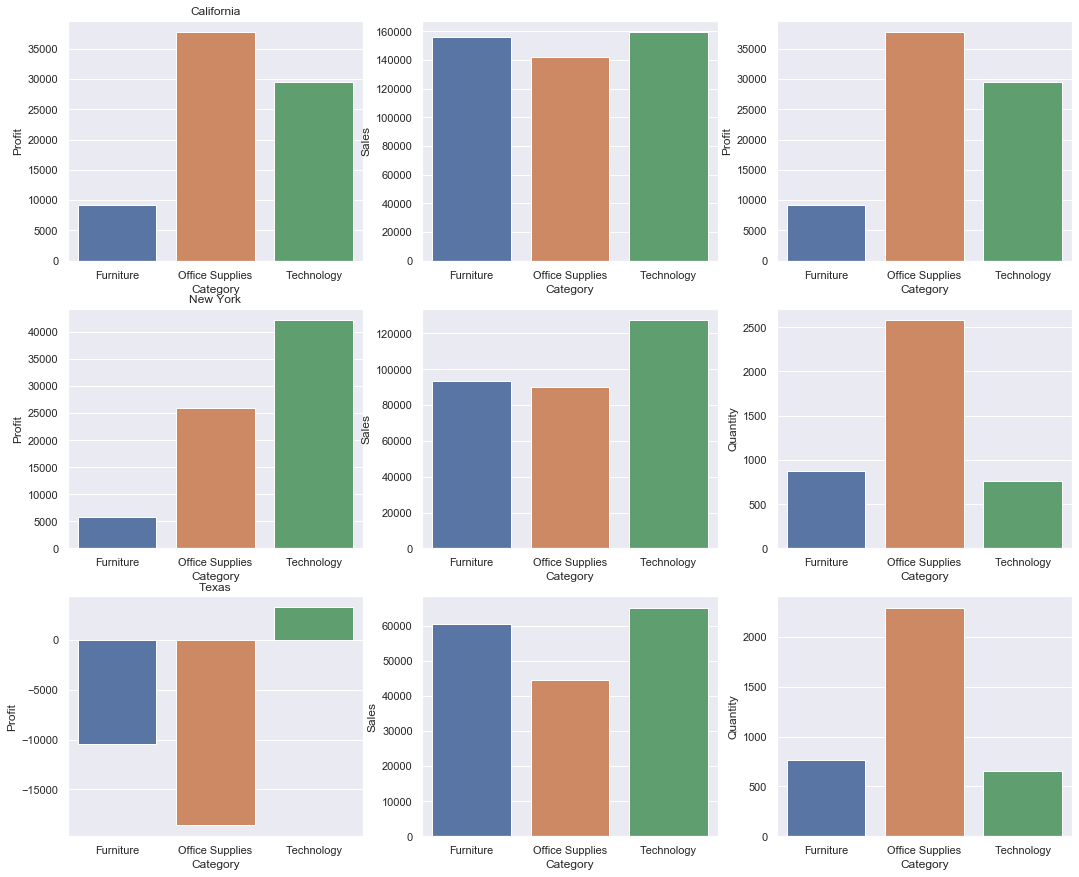

In [39]:
#California
california = data[data['State']=='California'].groupby('Category').sum()
california.reset_index(inplace=True)

#Texas
texas = data[data['State']=='Texas'].groupby('Category').sum()
texas.reset_index(inplace=True)

#New York
new_york = data[data['State']=='New York'].groupby('Category').sum()
new_york.reset_index(inplace=True)

plt.subplots(figsize=(18,15))
plt.subplot(3,3,1)

#plotting data for california
sns.barplot(x='Category', y='Profit', data=california)
plt.title('California')
plt.subplot(332)
sns.barplot(x='Category', y='Sales', data=california)
plt.subplot(333)
sns.barplot(x='Category', y='Profit', data=california)
plt.subplot(334)


#plotting data for New York
sns.barplot(x='Category', y='Profit', data=new_york)
plt.title('New York')
plt.subplot(335)
sns.barplot(x='Category', y='Sales', data=new_york)
plt.subplot(336)
sns.barplot(x='Category', y='Quantity', data=new_york)
plt.subplot(337)


#plotting data for Texas
sns.barplot(x='Category', y='Profit', data=texas)
plt.title('Texas')
plt.subplot(338)
sns.barplot(x='Category', y='Sales', data=texas)
plt.subplot(339)
sns.barplot(x='Category', y='Quantity', data=texas)
plt.show()

- Here we can see that in California, all 3 segments have similar sales but office supplies has gained the highest profit.
- In the state of New York, again all 3 segments have similar quantity of sales. Technology gained highest profit.
- Texas have faced massive losses in both Furniture and Office Suppies categories.
- Tech sector products have the highest amount of sales as well as a good total of profit.
- The company really needs to focus on the products beloging to the Furniture sector.

In [40]:
data['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

# 9. Segment-wise Ananlysis

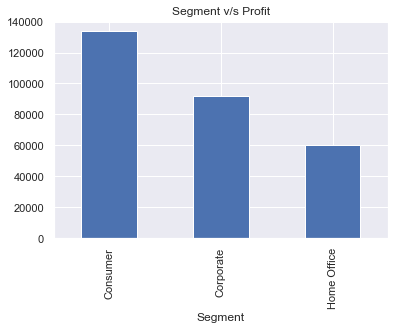

In [41]:
# plotting profits made in different segments
data.groupby('Segment')['Profit'].sum().plot(kind='bar', title='Segment v/s Profit')

- Consumer have been the major segment with sales of 5k and with a profit of 140k approx. for the company.
- Home Office segment has the least sales and profit.

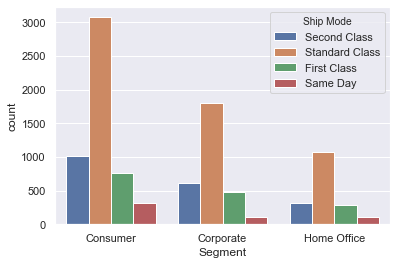

In [42]:
#analyzing what mode for shipment used in various sectors
sns.countplot(x='Segment', hue='Ship Mode', data=data)

- Standard shiping mode is the common preffered choice for all the segments.
- Very few people go for for same day shiping.